In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
# awesome_df = pd.read_csv('./datasets_SALA/Awesome/awesome_text.csv').replace(to_replace='None', value=np.nan).dropna()
# github_df = pd.read_csv('./datasets_SALA/Github/github_text.csv').replace(to_replace='None', value=np.nan).dropna()
# gitsum_df = pd.read_csv('./datasets_SALA/GitSum/gitsum-text-final.csv').replace(to_replace='None', value=np.nan).dropna()
# jupyter_df = pd.read_csv('./datasets_SALA/Jupyter/py_jupyter_text.csv').replace(to_replace='None', value=np.nan).dropna()
# pysmall_df = pd.read_csv('./datasets_SALA/Py_small/py_dataset_text.csv').replace(to_replace='None', value=np.nan).dropna()

awesome_df = pd.read_csv('./datasets_SALA/Awesome/awesome_text.csv').replace(to_replace='None', value=np.nan)
github_df = pd.read_csv('./datasets_SALA/Github/github_text.csv').replace(to_replace='None', value=np.nan)
gitsum_df = pd.read_csv('./datasets_SALA/GitSum/gitsum-text-final.csv').replace(to_replace='None', value=np.nan)
jupyter_df = pd.read_csv('./datasets_SALA/Jupyter/py_jupyter_text.csv').replace(to_replace='None', value=np.nan)
pysmall_df = pd.read_csv('./datasets_SALA/Py_small/py_dataset_text.csv').replace(to_replace='None', value=np.nan)

In [308]:
print(len(awesome_df), len(github_df), len(gitsum_df), len(jupyter_df), len(pysmall_df))

942 2459 4333 429 572


In [309]:
awesome_df = awesome_df.dropna()
github_df = github_df.dropna()
gitsum_df = gitsum_df.dropna()
jupyter_df = jupyter_df.dropna()
pysmall_df = pysmall_df.dropna()

In [310]:
SALA_df = pd.concat([awesome_df, github_df, gitsum_df, jupyter_df, pysmall_df])
SALA_df = SALA_df.drop(['id'], axis=1)
SALA_df

,repo_url,description,readme
0,https://github.com/Sholista/sholista,Shopping Lists that are Awesome,b'#Sholista\nSholista is an intelligent shoppi...
1,https://github.com/pushkarparanjpe/fluidmosaic,Awesome things found online often get burried ...,b'fluidmosaic\n===========\nAwesome things fou...
2,https://github.com/ziadoz/awesome-php,A curated list of amazingly awesome PHP librar...,b'# Awesome PHP \n\nA curated list of amazingl...
3,https://github.com/svaksha/Julia.jl,Curated decibans of Julia programming language.,b'# Julia.jl\n\n aggregates and curates deciba...
4,https://github.com/poldixd/contao-fa-list-types,⏩ You can create lists in Contao with Font Awe...,b'Font-Awesome-Contao-List-Types\n============...
...,...,...,...
567,https://github.com/0voice/interview_internal_r...,2023年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题人分析汇总。,2023年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题人分析汇总...
568,https://github.com/taki0112/UGATIT,Official Tensorflow implementation of U-GAT-IT...,U-GAT-IT &mdash; Official TensorFlow Implement...
569,https://github.com/UKPLab/sentence-transformers,Multilingual Sentence & Image Embeddings with ...,"Sentence Transformers: Multilingual Sentence, ..."
570,https://github.com/timesler/facenet-pytorch,Pretrained Pytorch face detection (MTCNN) and ...,Face Recognition Using PytorchYou can also rea...


In [311]:
SALA_df['token_count'] = SALA_df['description'].apply(lambda x : len(str(x).split(" ")))

In [312]:
SALA_df['token_count'].mode()[0]

6

In [313]:
SALA_df

,repo_url,description,readme,token_count
0,https://github.com/Sholista/sholista,Shopping Lists that are Awesome,b'#Sholista\nSholista is an intelligent shoppi...,5
1,https://github.com/pushkarparanjpe/fluidmosaic,Awesome things found online often get burried ...,b'fluidmosaic\n===========\nAwesome things fou...,35
2,https://github.com/ziadoz/awesome-php,A curated list of amazingly awesome PHP librar...,b'# Awesome PHP \n\nA curated list of amazingl...,12
3,https://github.com/svaksha/Julia.jl,Curated decibans of Julia programming language.,b'# Julia.jl\n\n aggregates and curates deciba...,6
4,https://github.com/poldixd/contao-fa-list-types,⏩ You can create lists in Contao with Font Awe...,b'Font-Awesome-Contao-List-Types\n============...,12
...,...,...,...,...
567,https://github.com/0voice/interview_internal_r...,2023年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题人分析汇总。,2023年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题人分析汇总...,1
568,https://github.com/taki0112/UGATIT,Official Tensorflow implementation of U-GAT-IT...,U-GAT-IT &mdash; Official TensorFlow Implement...,18
569,https://github.com/UKPLab/sentence-transformers,Multilingual Sentence & Image Embeddings with ...,"Sentence Transformers: Multilingual Sentence, ...",7
570,https://github.com/timesler/facenet-pytorch,Pretrained Pytorch face detection (MTCNN) and ...,Face Recognition Using PytorchYou can also rea...,10


In [314]:
SALA_df['token_count'].max(), SALA_df['token_count'].min()

(1412, 1)

In [315]:
# SALA_df = SALA_df[(SALA_df['token_count']) < 300 & (SALA_df['token_count'] > 0)]
# SALA_df = SALA_df[SALA_df['token_count'] < 300]

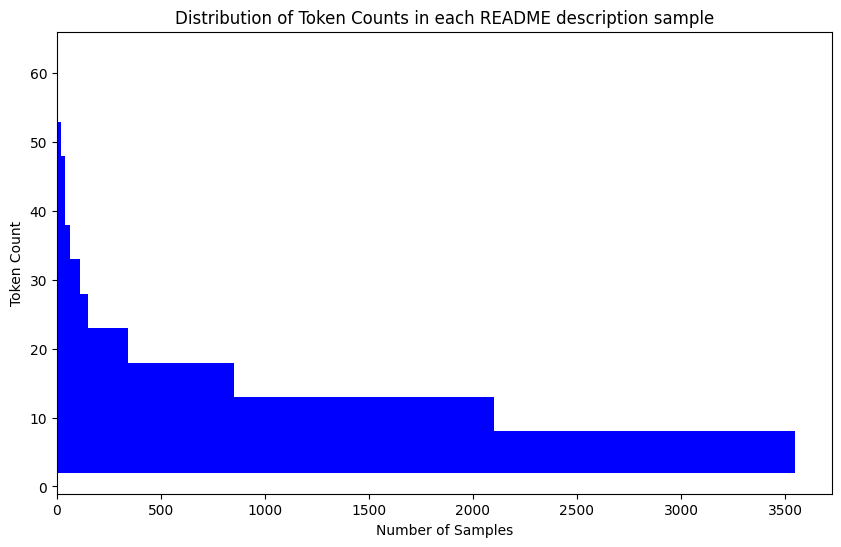

In [316]:
# Generate the histogram data
hist, bin_edges = np.histogram(SALA_df["token_count"], bins=range(5, 70, 5))

plt.figure(figsize=(10, 6))
plt.barh(bin_edges[:-1], hist, height=6, color='blue')
plt.xlabel('Number of Samples')
plt.ylabel('Token Count')
plt.title('Distribution of Token Counts in each README description sample')
plt.show()

In [ ]:
# X = [sample for sample in SALA_df['readme']]
# y = [sample for sample in SALA_df['description']]

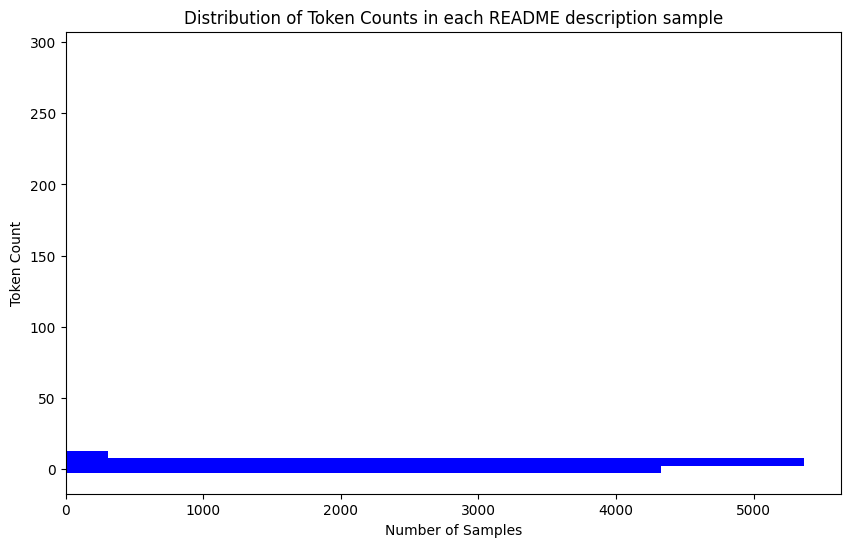

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the original token counts data
# Replace this with the actual data used to generate the plot
token_counts = np.random.poisson(5, 10000)

# Generate the histogram data
hist, bin_edges = np.histogram(token_counts, bins=range(0, 300, 5))

# Create a new plot with swapped axes
plt.figure(figsize=(10, 6))
plt.barh(bin_edges[:-1], hist, height=5, color='blue')
plt.xlabel('Number of Samples')
plt.ylabel('Token Count')
plt.title('Distribution of Token Counts in each README description sample')
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=1)

In [ ]:
# Train : Val : Test = 7 : 1 : 2
# print("Train size: %d\n"
#       "Validation size: %d\n"
#       "Test size: %d" %(len(X_train), len(X_val), len(X_test)))

In [ ]:
# X_train[0]

In [ ]:
# train_df = pd.DataFrame(list(zip(X_train, y_train)), columns=['readme', 'description'])
# validation_df = pd.DataFrame(list(zip(X_val, y_val)), columns=['readme', 'description'])
# test_df = pd.DataFrame(list(zip(X_test, y_test)), columns=['readme', 'description'])

In [ ]:
# train_df.to_csv('train.csv')
# validation_df.to_csv('validation.csv')
# test_df.to_csv('test.csv')